In [11]:
from scipy.io.arff import loadarff
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

In [12]:
## Load data in
data = loadarff('../Data/column_2C_weka.arff')
df = pd.DataFrame(data[0])

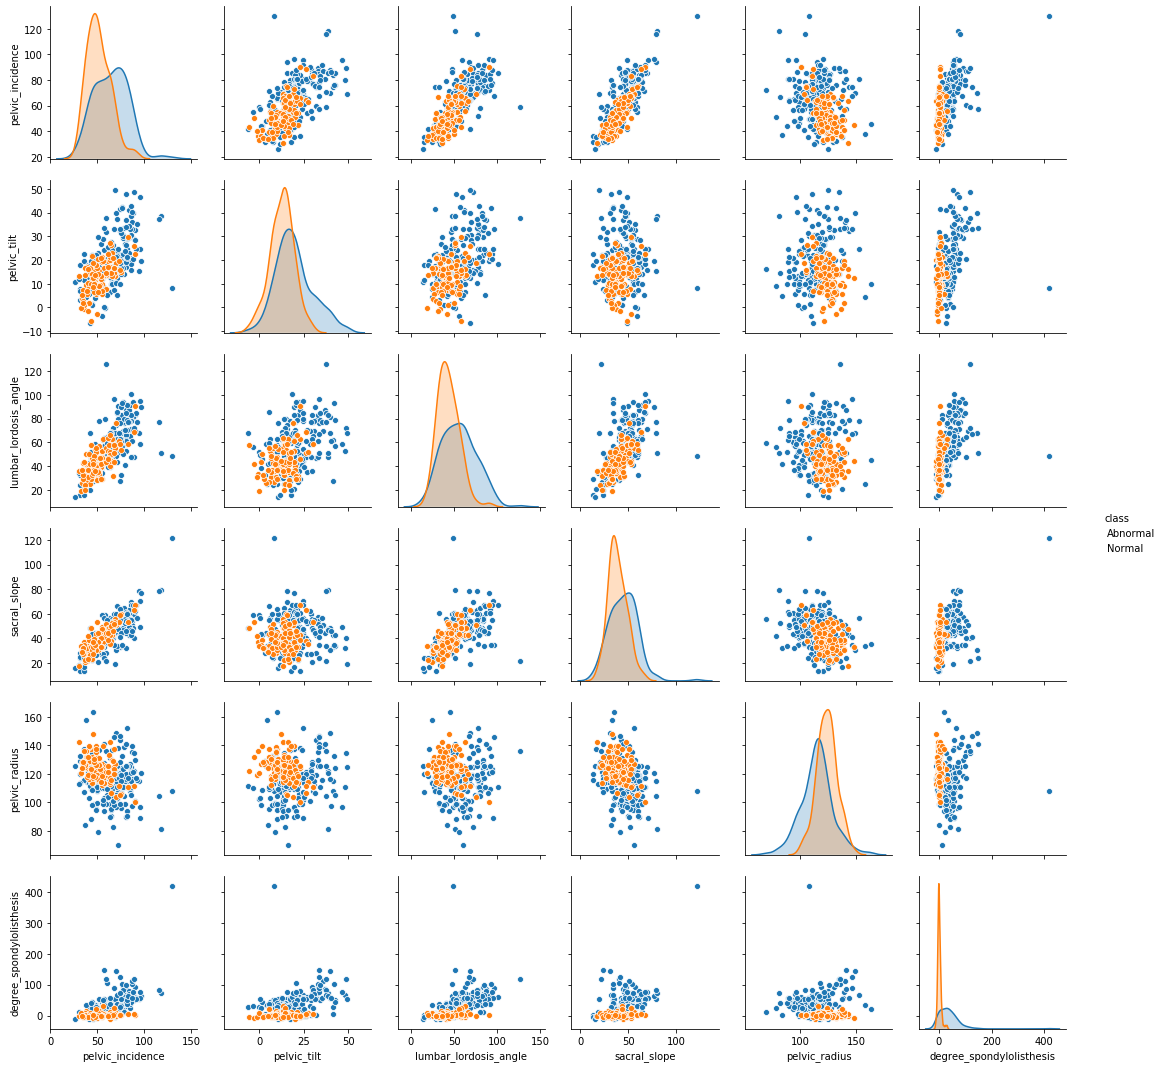

In [4]:
## Part b i (Scatterplots)
g = sns.pairplot(df, hue='class')

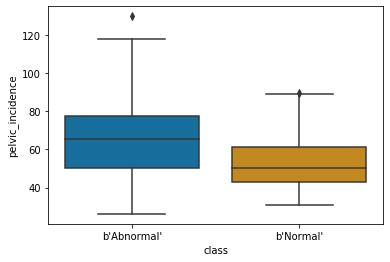

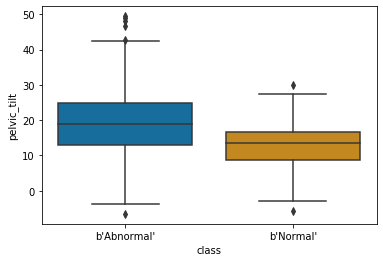

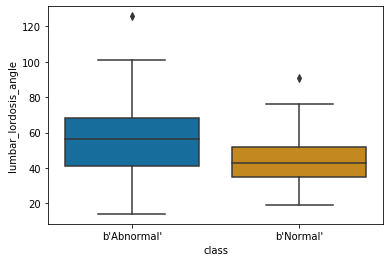

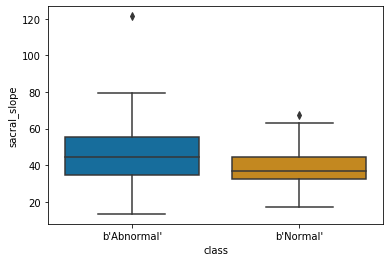

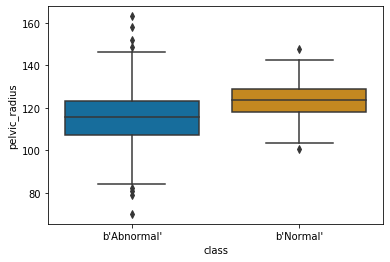

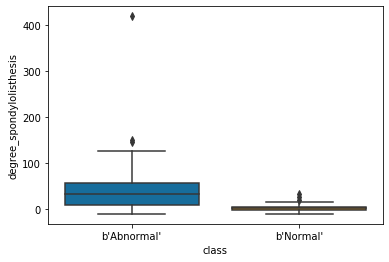

In [15]:
## Part b ii. BOXPLOT
for i in range(6):
    plt.figure(i)
    boxplot = sns.boxplot(y=df.iloc[:,i], x='class', data=df, palette='colorblind')

In [13]:
## LabelEncoder: Map Abnormal as 1 and Normal as 0
labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])

## remap the classification of the labelencoder
mapp = {0: 1, 1: 0}
df['class'] = df['class'].map(mapp)
print(df)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  class  
0        98.672917                 -0.254400 

In [14]:
# Part b iii. Split
normal = df[df['class'] == 0]
abnormal = df[df['class'] == 1]

normal_train, normal_test = normal.head(70), normal.tail(30)
abnormal_train, abnormal_test = abnormal.head(140), abnormal.tail(70)
train = pd.DataFrame(pd.concat([normal_train, abnormal_train], axis=0))
#train.reset_index()
test = pd.DataFrame(pd.concat([normal_test, abnormal_test], axis=0))
#test.reset_index()

train_y = train['class']
train_X = train.drop(columns='class')
test_y = test['class']
test_X = test.drop(columns='class')

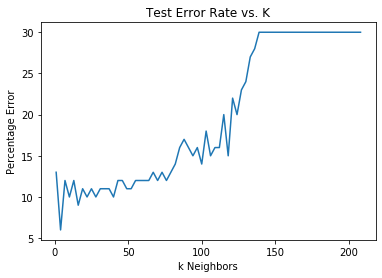

In [15]:
# Part c i/ii.
from sklearn.neighbors import KNeighborsClassifier
k = np.linspace(208, 1, num=70)
error_ptg = []
for i in k:
    neigh = KNeighborsClassifier(n_neighbors=int(i), p=2)
    neigh.fit(train_X, train_y)
    prediction = neigh.predict(test_X)

    diff = pd.DataFrame({'different': prediction != test_y})
    percentage = diff['different'].value_counts(normalize=True) * 100
    error_ptg.append(percentage[True])

plt.plot(k, error_ptg)
plt.title("Test Error Rate vs. K")
plt.xlabel("k Neighbors")
plt.ylabel("Percentage Error")
plt.show()

In [7]:
# PART c ii (cont)
## Ideal k* at 4
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(train_X, train_y)
prediction = neigh.predict(test_X)

import sklearn.metrics as sk
## confusion matrix
conf_matrix = sk.confusion_matrix(test_y, prediction)
print("Confusion matrix :" + str(conf_matrix))

## true positive & negative rate
true_pos = conf_matrix[0][0]
true_neg = conf_matrix[1][1]
print("True Positive Rate: " + str(true_pos))
print("True Negative Rate: " + str(true_neg))

## precision score
precision = sk.precision_score(test_y, prediction)
print("Precision Score: " + str(precision))

# f value
f = sk.f1_score(test_y, prediction)
print("F Score: " + str(f))

Confusion matrix :[[25  5]
 [ 1 69]]
True Positive Rate: 25
True Negative Rate: 69
Precision Score: 0.9324324324324325
F Score: 0.9583333333333333


Text(0, 0.5, 'Best Error Rate')

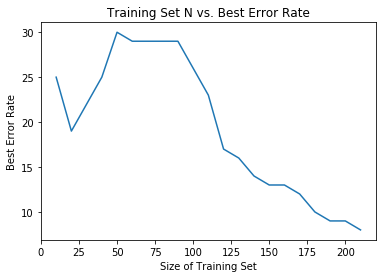

In [8]:
# Part c iii.
n = np.linspace(10, 210, num=21)
error_ptg = []
min_error_n = []
for i in n:
    t1 = normal_train.head(int(round(i/3)))
    t2 = abnormal_train.head(int(round(i-(i/3))))
    t = pd.DataFrame(pd.concat([t1, t2], axis=0))
    t_y = t['class']
    t_X = t.drop(columns=['class'])
    k = 1
    while k < i:
        neigh = KNeighborsClassifier(n_neighbors=k, p=2)
        neigh.fit(t_X, t_y)
        prediction = neigh.predict(test_X)

        diff = pd.DataFrame({'different': prediction != test_y})
        percentage = diff['different'].value_counts(normalize=True) * 100
        error_ptg.append(percentage[True])
        k += 5
    min_error = np.min(np.array(error_ptg))
    min_error_n.append(min_error)
    error_ptg = []


plt.plot(n, min_error_n)
plt.title("Training Set N vs. Best Error Rate")
plt.xlabel("Size of Training Set (n)")
plt.ylabel("Best Error Rate (%)")

        k  percentage_test_error
0     1.0                   11.0
1     6.0                   11.0
2    11.0                   11.0
3    16.0                   12.0
4    21.0                   12.0
5    26.0                   11.0
6    31.0                   12.0
7    36.0                   13.0
8    41.0                   13.0
9    46.0                   13.0
10   51.0                   14.0
11   56.0                   13.0
12   61.0                   15.0
13   66.0                   15.0
14   71.0                   14.0
15   76.0                   14.0
16   81.0                   16.0
17   86.0                   15.0
18   91.0                   20.0
19   96.0                   20.0
20  101.0                   22.0
21  106.0                   21.0
22  111.0                   23.0
23  116.0                   21.0
24  121.0                   22.0
25  126.0                   24.0
26  131.0                   28.0
27  136.0                   28.0
28  141.0                   30.0
29  146.0 

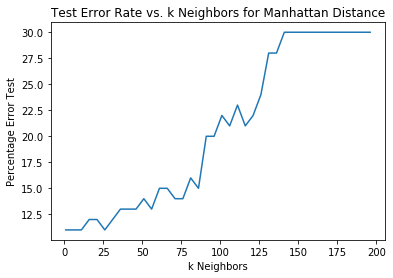

In [105]:
# d) i. A Manhattan Distance with p = 1

k = np.linspace(1, 196, num=40)
error_ptg_manh = []
for i in k:
    neigh = KNeighborsClassifier(n_neighbors=int(i), p=1)
    neigh.fit(train_X, train_y)
    prediction = neigh.predict(test_X)

    diff = pd.DataFrame({'different': prediction != test_y})
    percentage = diff['different'].value_counts(normalize=True) * 100
    error_ptg_manh.append(percentage[True])

plt.plot(k, error_ptg_manh)
plt.xlabel("k Neighbors")
plt.ylabel("Percentage Error Test")
plt.title("Test Error Rate vs. k Neighbors for Manhattan Distance")

tab = pd.DataFrame({"k": k, "percentage_test_error": error_ptg_manh})
print(tab)

## BEST K: 1, 6, 26

   log10(p)  percentage_test_error
0       0.1                    9.0
1       0.2                    9.0
2       0.3                    8.0
3       0.4                    8.0
4       0.5                    8.0
5       0.6                    6.0
6       0.7                    7.0
7       0.8                    8.0
8       0.9                    9.0
9       1.0                    9.0


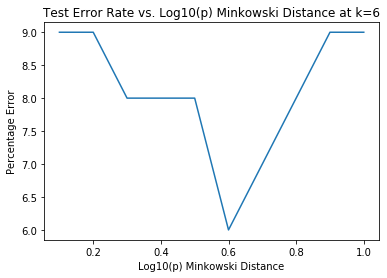

In [107]:
# d) ii. log(10)p

from sklearn.neighbors import DistanceMetric
from math import *
from decimal import Decimal 
  
# Function distance between two points  
# and calculate distance value to given 
# root value(p is root value) 
def p_root(value, root): 
    root_value = 1 / float(root) 
    return round (Decimal(value) ** Decimal(root_value), 3) 
  
def minkowski_distance(x, y, **kwargs): 
    # pass the p_root function to calculate 
    # all the value of vector parallely  
    return (p_root(sum(pow(abs(a-b), kwargs["power"]) for a, b in zip(x, y)), kwargs["power"]))

## CITATION: 

x = np.linspace(0.1, 1, 10)
f = lambda x: 10 ** x
p = f(x)
error_ptg_logp = []
for i in p:
    nbrs = KNeighborsClassifier(n_neighbors=6, metric=minkowski_distance, metric_params={"power": i})
    nbrs.fit(train_X, train_y)
    prediction = nbrs.predict(test_X)
    
    diff = pd.DataFrame({'different': prediction != test_y})
    percentage = diff['different'].value_counts(normalize=True)*100
    error_ptg_logp.append(percentage[True])

plt.plot(x, error_ptg_logp)
plt.title("Test Error Rate vs. Log10(p) Minkowski Distance at k=6")
plt.xlabel("Log10(p) Minkowski Distance")
plt.ylabel("Percentage Error")

tab2 = pd.DataFrame({"log10(p)": x, "percentage_test_error": error_ptg_logp})
print(tab2)
## RESULTS: Percentage Error minimized at log10(p) = 0.6

        k  percentage_test_error
0     1.0                   13.0
1     6.0                   10.0
2    11.0                   12.0
3    16.0                    8.0
4    21.0                   11.0
5    26.0                   12.0
6    31.0                   12.0
7    36.0                   10.0
8    41.0                   13.0
9    46.0                   12.0
10   51.0                   12.0
11   56.0                   12.0
12   61.0                   14.0
13   66.0                   13.0
14   71.0                   14.0
15   76.0                   11.0
16   81.0                   14.0
17   86.0                   12.0
18   91.0                   15.0
19   96.0                   14.0
20  101.0                   19.0
21  106.0                   18.0
22  111.0                   18.0
23  116.0                   18.0
24  121.0                   21.0
25  126.0                   21.0
26  131.0                   25.0
27  136.0                   28.0
28  141.0                   30.0
29  146.0 

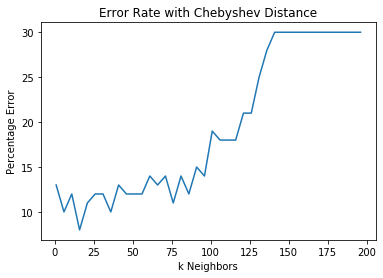

In [108]:
## # d) iii. CHEBYSHEV DISTANCE
from scipy.spatial import distance
def chebyshev_distance(x, y): 
    return distance.chebyshev(x, y)

k = np.linspace(1, 196, num=40)
error_ptg_cheb = []
for i in k:
    nbrs = KNeighborsClassifier(n_neighbors=int(i), metric=chebyshev_distance)
    nbrs.fit(train_X, train_y)
    prediction = nbrs.predict(test_X)
    
    diff = pd.DataFrame({'different': prediction != test_y})
    percentage = diff['different'].value_counts(normalize=True)*100
    error_ptg_cheb.append(percentage[True])

plt.plot(k, error_ptg_cheb)
plt.title("Error Rate with Chebyshev Distance")
plt.xlabel("k Neighbors")
plt.ylabel("Percentage Error")

tab3 = pd.DataFrame({'k': k, 'percentage_test_error': error_ptg_cheb})
print(tab3)

# RESULTS: k* at 16 with 8% error